**TASK**:
    1.To increse the accurancy  of the svc model(Wine Quality dataset)
    
    2.Hyperparameter tuning 
    
    3.Implement SVR (Admission Prediction)https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

# 1.To increse the accurancy  of the svc model(Wine Quality dataset)

In [1]:
# Importing Required Libraries:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

**Data Injection**

In [ ]:
# Load  Red-wine dataset
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Printing first five  rows of dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Printing last five rows of the dataset
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
# Printing total rows and columns of the dataset
data.shape

(1599, 12)

In [9]:
# Printing Information about dataset: columns,non-null values,data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# Printing statistical information about numerical columns of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
# Printing Features/columns of the dataset:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**2.Performing EDA**

In [16]:
# Printing Correlation
# To find the pairwise correlation of all columns
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


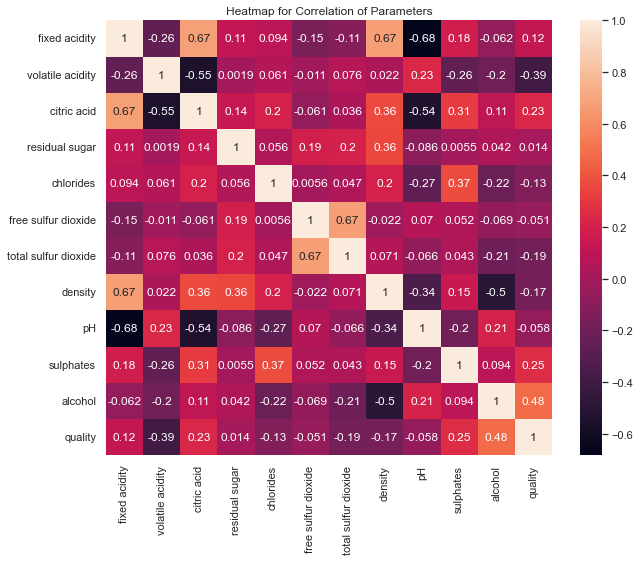

In [20]:
# Heatmap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot = True)
plt.title('Heatmap for Correlation of Parameters')
plt.show()

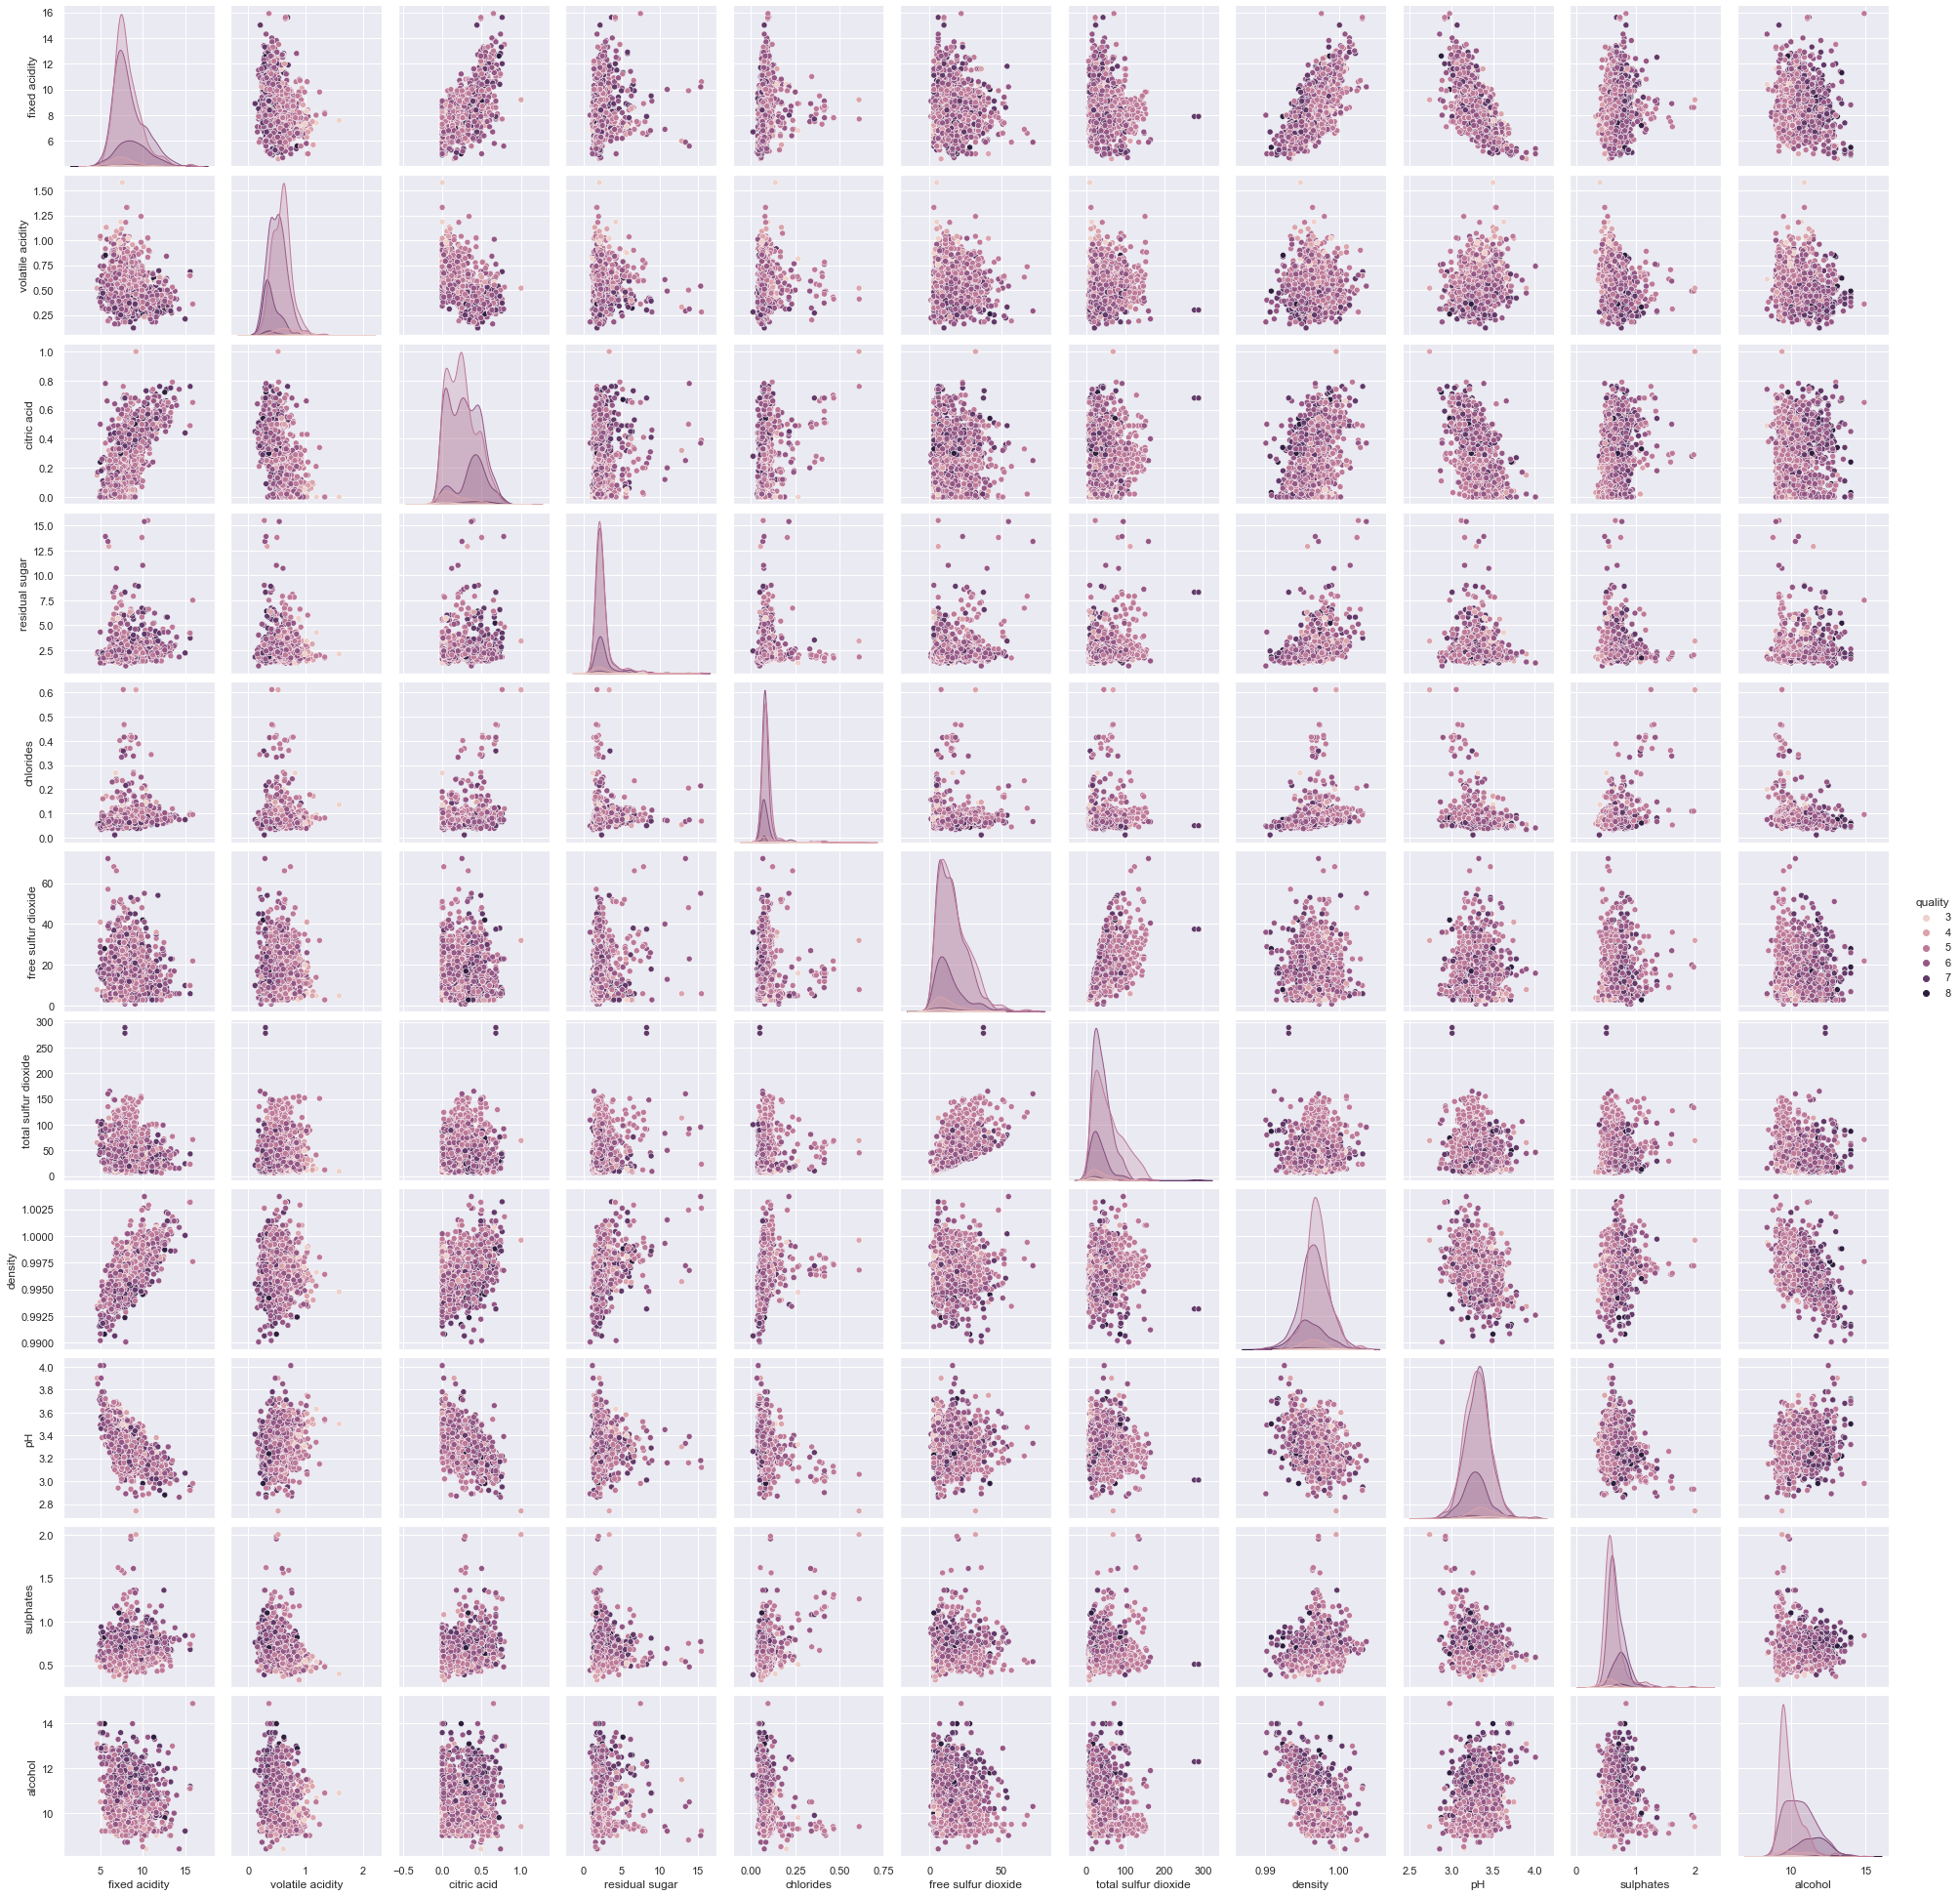

In [22]:
#pairplot

sns.pairplot(data, hue = 'quality')   
plt.show()

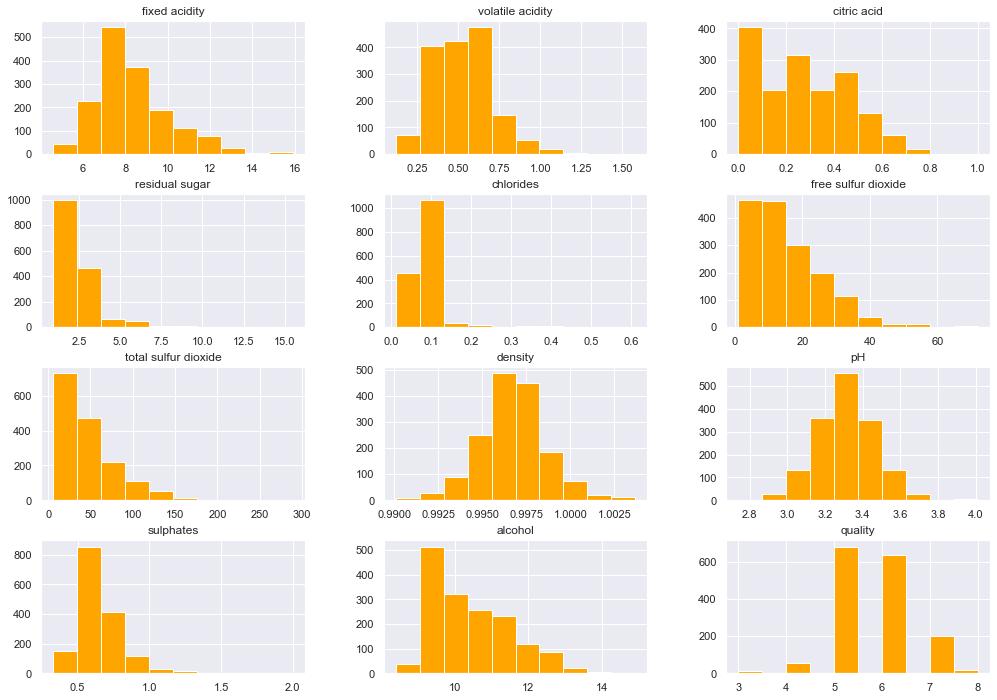

In [21]:
# PLotting Histogram for whole dataset 

data.hist(figsize=(17,12),color='orange')
plt.show()

**3.Pre-processing data**

In [11]:
#checking null values:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
data.quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [26]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [28]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [30]:
# Preparing data for model
# Independent Variables
# Drop "quality" variable because its a dependent variable
x=data.drop("quality",axis=1)

In [31]:
x.head() # Dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [75]:
# Dependent variable
#If a wine has quality value over 5 its is a good wine and if value is below 5 its bad wine¶

y=data["quality"]>5

In [76]:
y.head() # Series

0    False
1    False
2    False
3     True
4    False
Name: quality, dtype: bool

**Splitting data into Training data and Testing data**

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=42)
#  random_state=42 , we get the same train and test sets across different executions

In [78]:
x_train.shape

(1066, 11)

In [79]:
x_test.shape

(533, 11)

In [80]:
# Feature Scaling:Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
#Standardization:-StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.
# z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [81]:
x_train_tf=scaler.fit_transform(x_train)
x_train_tf

array([[-0.29377973, -0.18293925, -0.76486812, ..., -0.22511424,
         1.22191663, -0.57853942],
       [-0.35252466,  0.43893222, -0.45786489, ..., -0.16029204,
        -0.33880071, -0.20197217],
       [ 0.70488399,  0.0997296 ,  1.99816096, ..., -0.93815841,
         0.06582971, -0.76682305],
       ...,
       [-0.64624928,  0.495466  , -1.07187135, ...,  1.26579631,
        -0.68562678, -0.86096486],
       [-0.23503481, -1.87895237,  0.4119776 , ...,  0.03417455,
         0.81728621,  1.39843867],
       [-1.46867823, -1.37014843, -0.04852725, ...,  0.48792994,
        -0.68562678,  2.90470769]])

In [82]:
x_test_tf=scaler.transform(x_test)

x_test_tf

array([[-0.35252466,  0.15626337, -0.96953694, ..., -0.48440303,
         0.00802537, -0.76682305],
       [-0.29377973, -0.18293925, -0.50903209, ...,  0.48792994,
        -1.03245286, -0.86096486],
       [ 1.40982309,  0.77813485, -0.25319607, ..., -0.22511424,
         1.85776444, -0.48439761],
       ...,
       [-0.99871883,  0.55199977, -1.37887458, ..., -0.74369182,
        -1.20586589, -0.86096486],
       [ 1.58605786, -1.31361466,  1.58882332, ..., -0.03064764,
         1.27972098,  0.08045328],
       [ 0.05868982,  1.20213813, -0.81603532, ..., -0.80851402,
         0.9328949 , -0.76682305]])

In [83]:
x_train_tf.shape

(1066, 11)

**4. Create Model**

In [84]:
# Construct SVC :
from sklearn.svm import SVC
model=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False,random_state=None)
model.fit(x_train_tf,y_train)

SVC(gamma='auto')

In [85]:
model.score(x_train_tf,y_train)

0.8048780487804879

In [86]:
y_pred=model.predict(x_test_tf)

In [87]:
y_pred

array([False, False,  True, False,  True, False, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True,  True,

**5.Evaluate Model(Permormance matrics)**

**The confusion matrix:**
provides us a matrix output and describe the performance of the model

#Each row in a confusion matrix represents an actual class, while each column represents a predicted class. For more info about the confusion

In [88]:
c=confusion_matrix(y_test,y_pred)

In [89]:
print("Confusin Matrix :\n",c )

Confusin Matrix :
 [[185  55]
 [ 72 221]]


**Accuracy: TP+TN/(TP+FP+FN+TN)**

#Accuracy is how close a given set of measurements are to their true value

In [90]:
a=accuracy_score(y_test,y_pred)

In [93]:
print("Accuracy:\n",a*100)

Accuracy:
 76.17260787992495


 **precision = (TP) / (TP+FP)**

TP is the number of true positives, and FP is the number of false positives. 

Out of all actual values how many are correctly predicted

In [94]:
p=precision_score(y_test,y_pred)

In [96]:
print("Precision:\n",p*100)

Precision:
 80.07246376811594


**Recall :
= (TP) / (TP+FN)**

Out of all the predicted values how many are correctly predicted

In [97]:
r=recall_score(y_test,y_pred)

In [99]:
print("Recall:\n",r*100)

Recall:
 75.42662116040955


# 3.Implement SVR (Admission Prediction)

In [100]:
#Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

**Data Injection**

In [101]:
# load dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [102]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [103]:
# Printing first five  rows of dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [104]:
# Printing last five rows of the dataset
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [106]:
# Printing total rows and columns of the dataset
df.shape

(500, 9)

In [107]:
# Printing Information about dataset: columns,non-null values,data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [108]:
# Printing statistical information about numerical columns of the dataset
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [109]:
# Printing Features/columns of the dataset:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [118]:
# Drop irrelevant column
df=df.drop('Serial No.',axis=1)

In [119]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**2.Performing EDA**

In [120]:
# Printing Correlation
# To find the pairwise correlation of all columns
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


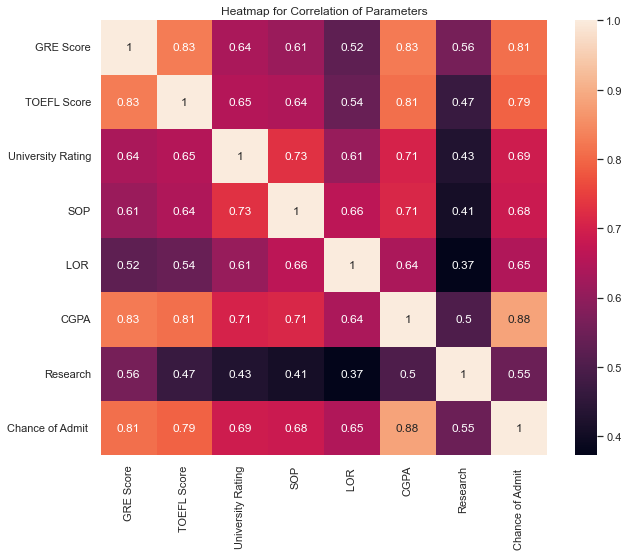

In [122]:
# Heatmap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot = True)
plt.title('Heatmap for Correlation of Parameters')
plt.show()

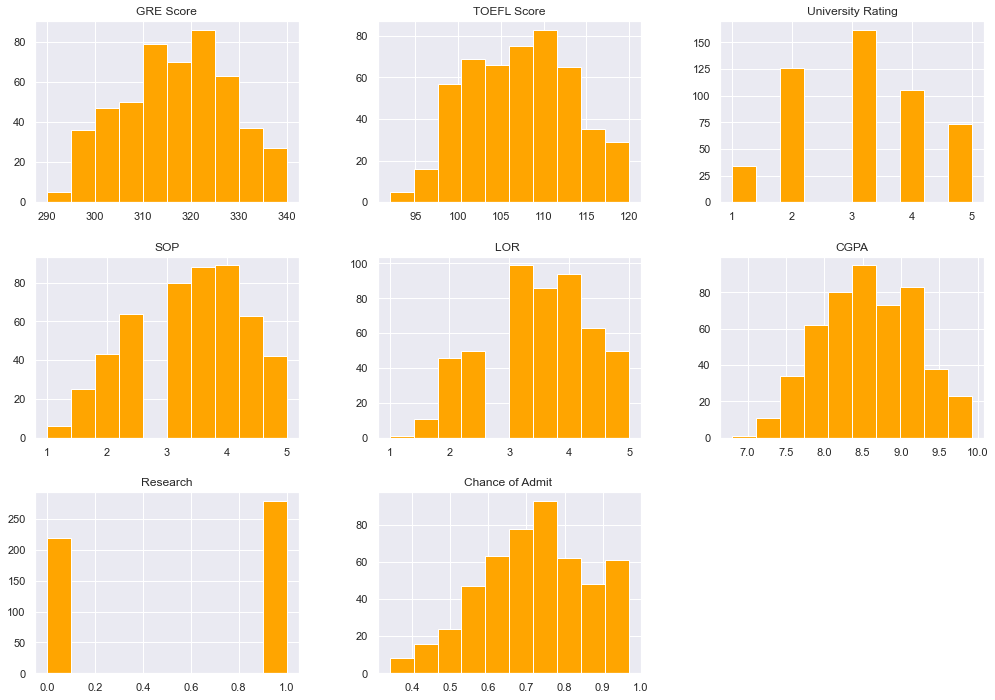

In [123]:
# PLotting Histogram for whole dataset 

df.hist(figsize=(17,12),color='orange')
plt.show()

**3.Pre-processing data**

In [124]:
#checking null values:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [134]:
# Preparing data for model
# Independent Variables
X = df.drop(['Chance of Admit '], axis=1)

In [135]:
# Dependent variable
Y = df['Chance of Admit ']

In [136]:
# Feature scaling:Standardization
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=42)
#  random_state=42 , we get the same train and test sets across different executions

In [138]:
X_train,X_test

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 7          308          101                  2  3.0   4.0  7.90         0
 453        319          103                  3  2.5   4.0  8.76         1
 108        331          116                  5  5.0   5.0  9.38         1
 37         300          105                  1  1.0   2.0  7.80         0
 157        309          104                  2  2.0   2.5  8.26         0
 ..         ...          ...                ...  ...   ...   ...       ...
 106        329          111                  4  4.5   4.5  9.18         1
 270        306          105                  2  2.5   3.0  8.22         1
 348        302           99                  1  2.0   2.0  7.25         0
 435        309          105                  2  2.5   4.0  7.68         0
 102        314          106                  2  4.0   3.5  8.25         0
 
 [333 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Researc

In [139]:
Y_train,Y_test

(7      0.68
 453    0.73
 108    0.93
 37     0.58
 157    0.65
        ... 
 106    0.87
 270    0.72
 348    0.57
 435    0.55
 102    0.62
 Name: Chance of Admit , Length: 333, dtype: float64,
 361    0.93
 73     0.84
 374    0.39
 155    0.77
 104    0.74
        ... 
 428    0.69
 29     0.54
 437    0.61
 471    0.64
 26     0.76
 Name: Chance of Admit , Length: 167, dtype: float64)

In [140]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [143]:
X_train_tf=sc.fit_transform(X_train)
X_train_tf

array([[-0.7968608 , -1.03387826, -0.94693218, ...,  0.53905094,
        -1.1559666 , -1.15268006],
       [ 0.20310532, -0.70676998, -0.07825886, ...,  0.53905094,
         0.29357239,  0.86754342],
       [ 1.29397746,  1.41943381,  1.65908778, ...,  1.61715282,
         1.33858887,  0.86754342],
       ...,
       [-1.34229687, -1.36098653, -1.8156055 , ..., -1.61715282,
        -2.2515484 , -1.15268006],
       [-0.70595479, -0.37966171, -0.94693218, ...,  0.53905094,
        -1.5267789 , -1.15268006],
       [-0.25142473, -0.21610757, -0.94693218, ...,  0.        ,
        -0.56603794, -1.15268006]])

In [146]:
X_test_tf=sc.transform(X_test)
X_test_tf

array([[ 1.53415004,  1.51346282,  0.74645702, ...,  0.05220513,
         1.57167975,  0.92496246],
       [-0.15975447,  0.17793684,  0.74645702, ...,  0.5970962 ,
         0.77165988,  0.92496246],
       [-0.07505924, -0.3228854 , -1.03437616, ..., -1.037577  ,
        -1.45239535, -1.08112496],
       ...,
       [ 0.09433121, -0.15594465, -1.92479276, ...,  0.05220513,
        -1.45239535,  0.92496246],
       [-0.41384014, -0.65676689, -0.14395957, ...,  0.5970962 ,
        -0.74837786, -1.08112496],
       [ 0.51780734,  0.34487759,  1.63687362, ...,  0.05220513,
         0.38765034, -1.08112496]])

In [147]:
x_train_tf.shape

(1066, 11)

**4. Create Model**

In [149]:
from sklearn.svm import SVR

In [156]:
# Construct SVR :
svr = SVR()
svr.fit(X_train, Y_train)

SVR()

In [162]:
svr.score(X_train_tf,Y_train)

C:\Users\kamlakar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


-23.45186105230576

In [157]:
#Prediction on test data
Y_pred=svr.predict(X_test)

In [158]:
from sklearn.metrics import r2_score

In [163]:
score=r2_score(Y_test,Y_pred)

In [164]:
print(score)

0.6696186165818441
